<a href="https://colab.research.google.com/github/Ekagra444/knn_withoutLibrary/blob/main/labassig2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading the dataset

In [76]:
from sklearn.datasets import load_iris
# import pandas as pd


data = load_iris()
# print(iris.feature_names)
# df= pd.DataFrame(data=iris.data, columns= iris.feature_names)
# df['target'] = iris.target
# df.tail()
X=data.data
Y=data.target

 handling missing data

> Add blockquote



In [77]:
import numpy as np
def check_and_impute_missing(X):
    """Check for missing values and impute with mean if found"""
    # Check for missing values
    missing_count = np.isnan(X).sum()

    if missing_count == 0:
        print("No missing values found in the dataset.")
        return X.copy()  # Return a copy of original if no missing values

    print(f"Found {missing_count} missing value(s) in the dataset.")
    print("Missing values per feature:")
    print(np.isnan(X).sum(axis=0))

    # Calculate mean for each feature (ignoring NaNs)
    col_means = np.nanmean(X, axis=0)

    # Create a copy and replace NaNs with column means
    X_imputed = X.copy()
    nan_mask = np.isnan(X)
    X_imputed[nan_mask] = np.take(col_means, np.where(nan_mask)[1])

    print("\nMissing values after imputation:")
    print(np.isnan(X_imputed).sum(axis=0))

    return X_imputed

# Process the data
X_processed = check_and_impute_missing(X)

No missing values found in the dataset.


handling missing value but without using numpy library

In [78]:
# def check_and_impute_missing(X):
#     """Check for missing values and impute with column means"""
#     # First check if we have any None or NaN values
#     has_missing = any(any(cell is None or cell != cell for cell in row) for row in X)  # NaN != NaN

#     if not has_missing:
#         print("No missing values found")
#         return [row[:] for row in X]  # Return a copy

#     print("Missing values found - imputing with column means")

#     # Calculate column means (ignoring missing values)
#     n_cols = len(X[0])
#     sums = [0.0] * n_cols
#     counts = [0] * n_cols

#     for row in X:
#         for i in range(n_cols):
#             val = row[i]
#             if val is not None and val == val:  # Check for None and NaN (NaN != NaN)
#                 sums[i] += val
#                 counts[i] += 1

#     means = [sums[i]/counts[i] if counts[i] > 0 else 0 for i in range(n_cols)]

#     # Create imputed dataset
#     X_imputed = []
#     for row in X:
#         new_row = []
#         for i in range(n_cols):
#             val = row[i]
#             if val is None or val != val:  # If missing or NaN
#                 new_row.append(means[i])
#             else:
#                 new_row.append(val)
#         X_imputed.append(new_row)

#     return X_imputed

# # Process data
# X_processed = check_and_impute_missing(X)


Feature normalization

In [83]:
# Normalize features
import pandas as pd
def normalize_features(X):

    min_vals = X.min(axis=0)
    max_vals = X.max(axis=0)
    ranges = max_vals - min_vals
    ranges[ranges == 0] = 1  # Avoid division by zero
    return (X - min_vals) / ranges
# X_processed1=pd.DataFrame(X_processed)
X_normalized = normalize_features(X_processed)

In [84]:
from sklearn.model_selection import train_test_split
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

print("\nTraining set size:", len(X_train))
print("Test set size:", len(X_test))
# X_test



Training set size: 120
Test set size: 30


30
30
 Evaluation Metrics:
Accuracy: 1.00
Precision (macro): 1.00
Recall (macro): 1.00
F1-Score (macro): 1.00


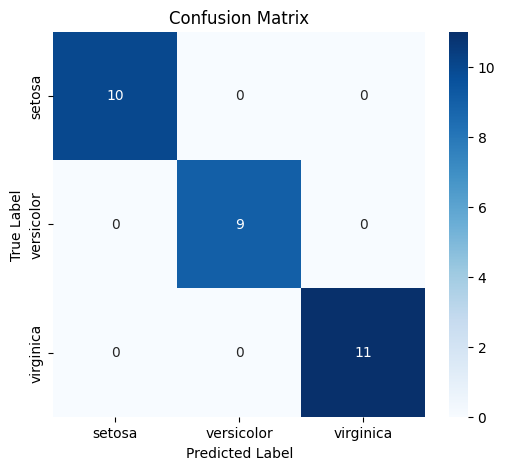

In [85]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 5: KNN prediction function
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return np.array(predictions)

# Step 6: Make predictions
y_pred = knn_predict(X_train, y_train, X_test, k=5)
print(len(y_test))
print(len(y_pred))
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # macro for multi-class avoids unfairness
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(" Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1-Score (macro): {f1:.2f}")

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

checking accuracy for different k values and finding where result blows out

In [86]:
for k in range(1, 100):  # Try k from 1 to 20
    y_pred = knn_predict(X_train, y_train, X_test, k=k)
    accuracy = accuracy_score(y_test, y_pred)
    if(accuracy<0.9):
        print(k,accuracy)





79 0.6333333333333333
80 0.6333333333333333
81 0.6333333333333333
82 0.6333333333333333
83 0.6333333333333333
84 0.6333333333333333
85 0.6
86 0.5
87 0.5
88 0.5
89 0.5
90 0.4666666666666667
91 0.4666666666666667
92 0.3333333333333333
93 0.3
94 0.3
95 0.3
96 0.3
97 0.3
98 0.3
99 0.3


accuracy falls drastically after k=78

question 2 - knn for regression


In [2]:
import math
import random
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
# Load dataset
housing = fetch_california_housing()
X = housing.data.tolist()  # Convert to list of lists
y = housing.target.tolist()  # Convert to list

# Normalization function (Min-Max scaling)
def normalize_features(data):
    if not data:
        return data

    # Transpose the data to get columns
    transposed = list(zip(*data))
    normalized = []

    for col in transposed:
        min_val = min(col)
        max_val = max(col)
        if max_val == min_val:
            # Handle case where all values are the same
            normalized_col = [0.0 for _ in col]
        else:
            normalized_col = [(x - min_val) / (max_val - min_val) for x in col]
        normalized.append(normalized_col)

    # Transpose back to original structure
    return list(zip(*normalized))

# Normalize features
X_normalized = normalize_features(X)



In [5]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    # Validate inputs
    if len(X) != len(y):
        raise ValueError("X and y must have the same length")
    if not (0 < test_size < 1):
        raise ValueError("test_size must be between 0 and 1")

    # Simple random number generator (Linear Congruential Generator)
    def lcg(seed=None):
        # Constants from glibc (GNU C Library)
        a = 1103515245
        c = 12345
        m = 2**31
        if seed is None:
            seed = 42  # Default seed
        while True:
            seed = (a * seed + c) % m
            yield seed / m  # Yield float between 0 and 1 yield enables lazy computation means that it stops computation here and resumes when asked again with next()

    # Initialize generator
    rng = lcg(random_state)

    # Combine features and labels
    combined = list(zip(X, y))

    # Fisher-Yates shuffle algorithm
    n = len(combined)
    for i in range(n-1, 0, -1):
        # Get random index between 0 and i
        j = int(next(rng) * (i + 1))
        # Swap elements
        combined[i], combined[j] = combined[j], combined[i]

    # Unzip back into X and y
    X_shuffled, y_shuffled = zip(*combined)
    X_shuffled = list(X_shuffled)
    y_shuffled = list(y_shuffled)

    # Calculate split index
    split_idx = int(len(X) * (1 - test_size))

    # Split the data
    X_train = X_shuffled[:split_idx]
    X_test = X_shuffled[split_idx:]
    y_train = y_shuffled[:split_idx]
    y_test = y_shuffled[split_idx:]

    return X_train, X_test, y_train, y_test

Mean Squared Error: 0.40
R2 Score: 0.70


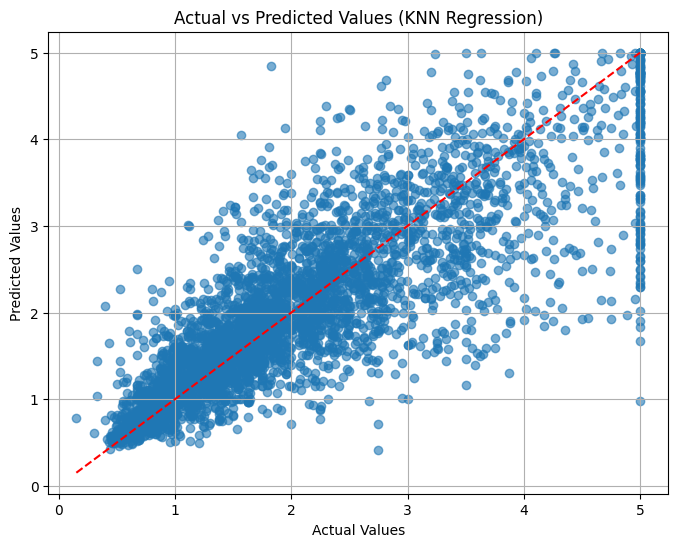

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# KNN Regressor implementation
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for test_point in X:
            # Calculate distances to all training points
            distances = []
            for train_point in self.X_train:
                # Euclidean distance calculation
                distance = 0.0
                for i in range(len(test_point)):
                    distance += (test_point[i] - train_point[i]) ** 2
                distances.append(math.sqrt(distance))

            # Get indices of k nearest neighbors
            # Create list of (index, distance) pairs
            indexed_distances = list(enumerate(distances))
            # Sort by distance
            sorted_distances = sorted(indexed_distances, key=lambda x: x[1])
            # Get indices of k smallest distances
            k_indices = [index for index, _ in sorted_distances[:self.k]]

            # Get the target values of the k nearest neighbors
            k_nearest_targets = [self.y_train[i] for i in k_indices]

            # Predict as the mean of the k nearest neighbors
            prediction = sum(k_nearest_targets) / len(k_nearest_targets)
            predictions.append(prediction)

        return predictions

# Evaluation metrics
def mean_squared_error(y_true, y_pred):
    error = 0.0
    for true, pred in zip(y_true, y_pred):
        error += (true - pred) ** 2
    return error / len(y_true)

def r2_score(y_true, y_pred):
    y_mean = sum(y_true) / len(y_true)
    ss_total = sum((y - y_mean) ** 2 for y in y_true)
    ss_residual = sum((y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true)))
    return 1 - (ss_residual / ss_total)

# Train and predict
knn = KNNRegressor(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (KNN Regression)')
plt.grid(True)
plt.show()